In [1]:
import numpy as np
import math
import cPickle
from sklearn.utils import shuffle
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# load data
f = open("data1.txt", "r")
X = []
Y = []
for line in f.readlines():
    x = line.split()
    X.append([int(x[0]), int(x[1]), 1])
    Y.append(int(x[2]))

In [3]:
# parameters
T = 10

In [4]:
# Voting perceptron
c = []
w = []
c.append(0)
w.append([0,0,0])
for iteration in range(T):
    X, Y = shuffle(X, Y)
    for i in range(len(Y)):
        if np.sign(np.dot(c, np.sign(np.dot(w, X[i])))) != Y[i]:
            if Y[i] > 0:
                tmp = np.add(w[-1], X[i])
            else:
                tmp = np.subtract(w[-1], X[i])
            w.append(tmp)
            c.append(1)
        else:
            c[-1] += 1

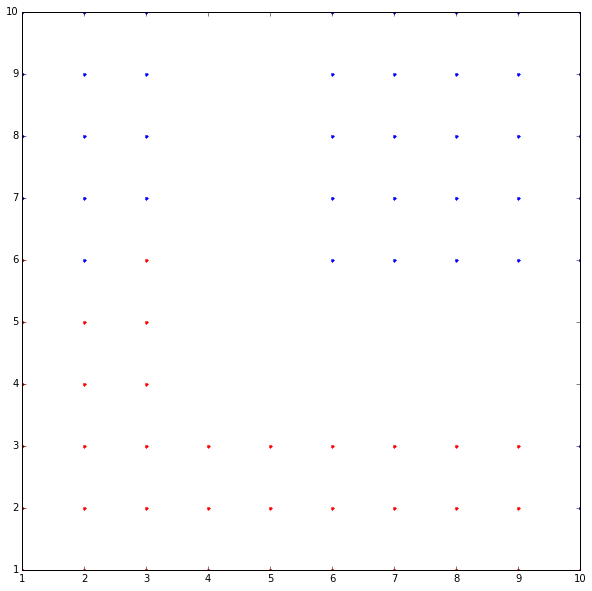

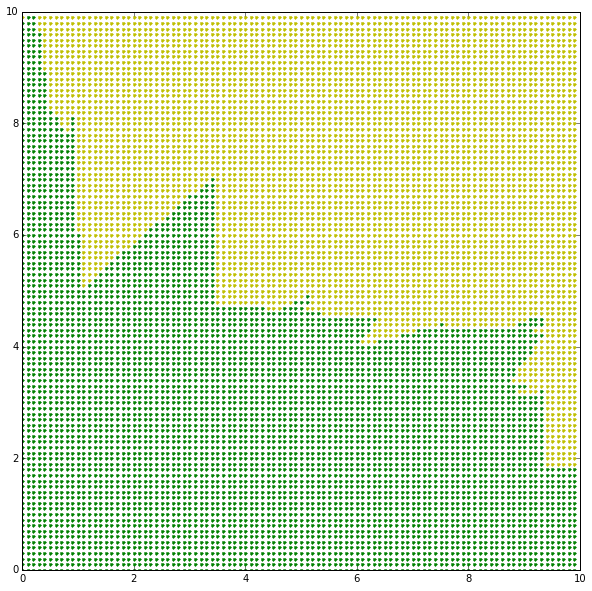

In [7]:
# decision boundary -- right
plt.figure(figsize=(10,10))
for i in range(len(Y)):
    if np.sign(np.dot(c, np.sign(np.dot(w, X[i])))) == 1:
        plt.plot(X[i][0], X[i][1], 'r.')
    else:
        plt.plot(X[i][0], X[i][1], 'b.')
plt.figure(figsize=(10,10))
for i in np.arange(0,10,0.1):
    for j in np.arange(0,10,0.1):
        x = [i,j,1]
        if np.sign(np.dot(c, np.sign(np.dot(w, x)))) == 1:
            plt.plot(x[0], x[1], 'g.')
        else:
            plt.plot(x[0], x[1], 'y.')

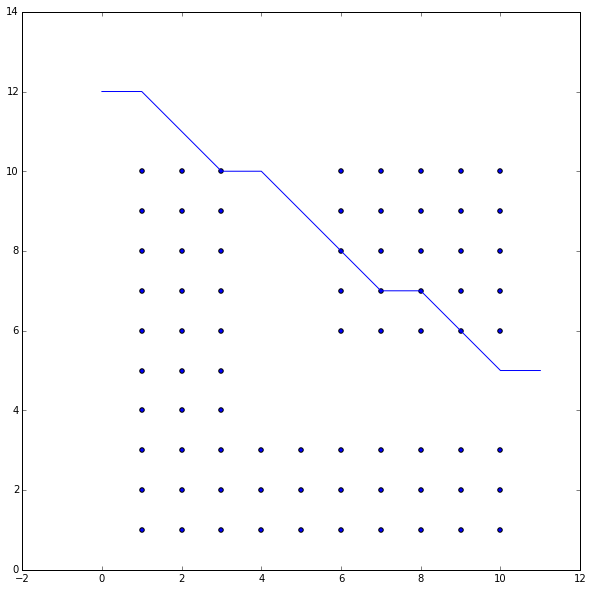

In [38]:
# decision boundary -- wrong
final_w = np.dot(c, w)
plt.figure(figsize=(10,10))
plt.scatter([x[0] for x in X], [x[1] for x in X])
plt.plot(range(0,12,1), [(-final_w[2] - final_w[0] * x) / final_w[1] for x in range(0,12,1)])

In [15]:
# Voting perceptron
L = 400
T = 20
c = []
w = []
c.append(0)
w.append([0,0,0])
for iteration in range(T):
    X, Y = shuffle(X, Y)
    for i in range(len(Y)):
        if len(w) == L:
            tmp_w1 = np.divide(np.dot(c[0:-1], w[0:-1]), np.sum(c[0:-1]))
            tmp_c1 = np.sum(c[0:-1])
            tmp_w2 = w[-1]
            tmp_c2 = c[-1]
            w = []
            w.append(tmp_w1)
            w.append(tmp_w2)
            c = []
            c.append(tmp_c1)
            c.append(tmp_c2)
        if np.sign(np.dot(c, np.sign(np.dot(w, X[i])))) != Y[i]:
            if Y[i] > 0:
                tmp = np.add(w[-1], X[i])
            else:
                tmp = np.subtract(w[-1], X[i])
            w.append(tmp)
            c.append(1)
        else:
            c[-1] += 1
        '''
        if np.sign(np.dot(c, np.sign(np.dot(w, X[i])))) != Y[i]:
            if Y[i] > 0:
                tmp = np.add(w[-1], X[i])
            else:
                tmp = np.subtract(w[-1], X[i])
            if(len(w) > L):
                c, w = shuffle(c, w)
                ind = np.argmin(c)
                c[ind] = 1
                w[ind] = tmp
            else:
                w.append(tmp)
                c.append(1)
        else:
            c[-1] += 1
        '''

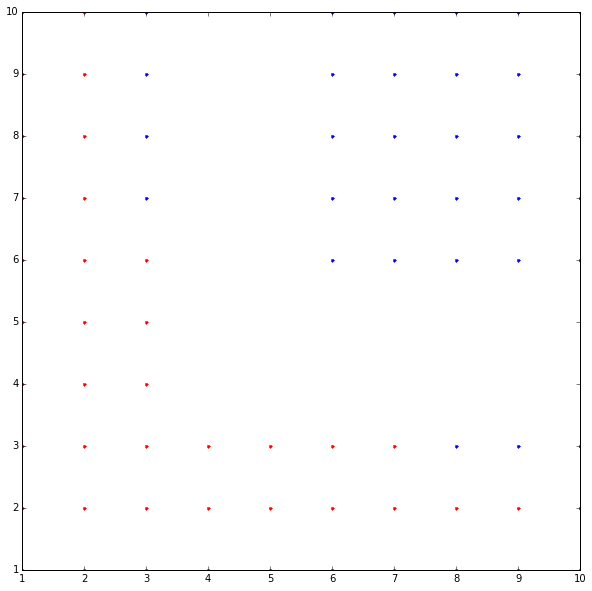

In [16]:
# decision boundary -- right
plt.figure(figsize=(10,10))
for i in range(len(Y)):
    if np.sign(np.dot(c, np.sign(np.dot(w, X[i])))) == 1:
        plt.plot(X[i][0], X[i][1], 'r.')
    else:
        plt.plot(X[i][0], X[i][1], 'b.')

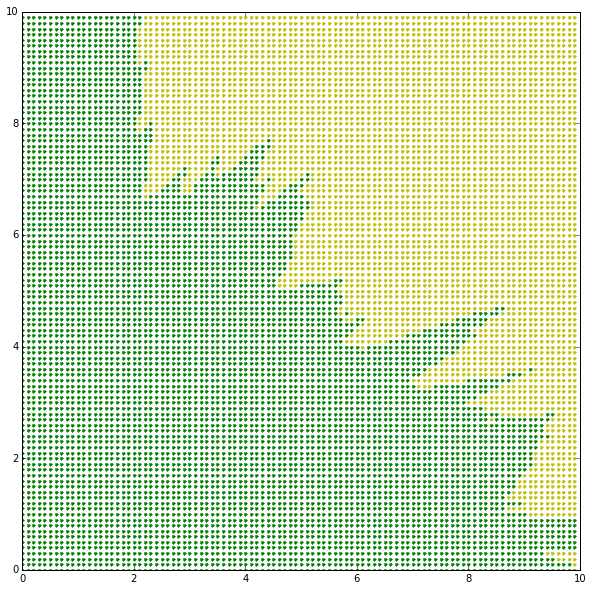

In [17]:
plt.figure(figsize=(10,10))
for i in np.arange(0,10,0.1):
    for j in np.arange(0,10,0.1):
        x = [i,j,1]
        if np.sign(np.dot(c, np.sign(np.dot(w, x)))) == 1:
            plt.plot(x[0], x[1], 'g.')
        else:
            plt.plot(x[0], x[1], 'y.')

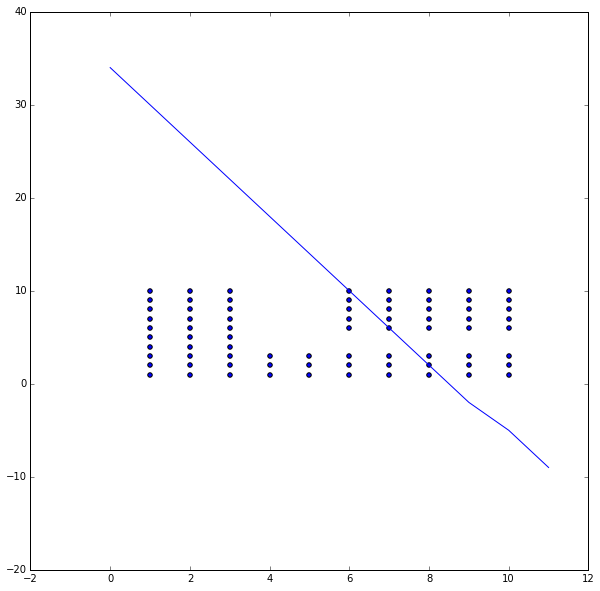

In [78]:
# wrong boundary plot
final_w = np.dot(c, w)
plt.figure(figsize=(10,10))
plt.scatter([x[0] for x in X], [x[1] for x in X])
plt.plot(range(0,12,1), [(-final_w[2] - final_w[0] * x) / final_w[1] for x in range(0,12,1)])

In [55]:
# Voting perceptron -- c
L = 2
T = 10
c = []
w = []
c.append(0.0)
w.append([0.0,0.0,0.0])
for iteration in range(T):
    X, Y = shuffle(X, Y)
    for i in range(len(Y)):
        if np.sign(np.dot(c, np.sign(np.dot(w, X[i])))) != Y[i]:
            if Y[i] > 0:
                tmp = np.add(w[-1], X[i])
            else:
                tmp = np.subtract(w[-1], X[i])
            if len(w) >= L:
                tmp_w1 = np.divide(np.dot(c, w), 1.0 * np.sum(c))
                tmp_c1 = np.sum(c) * 1.0
                w = []
                c = []
                w.append(tmp_w1)
                c.append(tmp_c1)
                w.append(tmp)
                c.append(1.0)
            else:
                w.append(tmp)
                c.append(1.0)
        else:
            c[-1] += 1

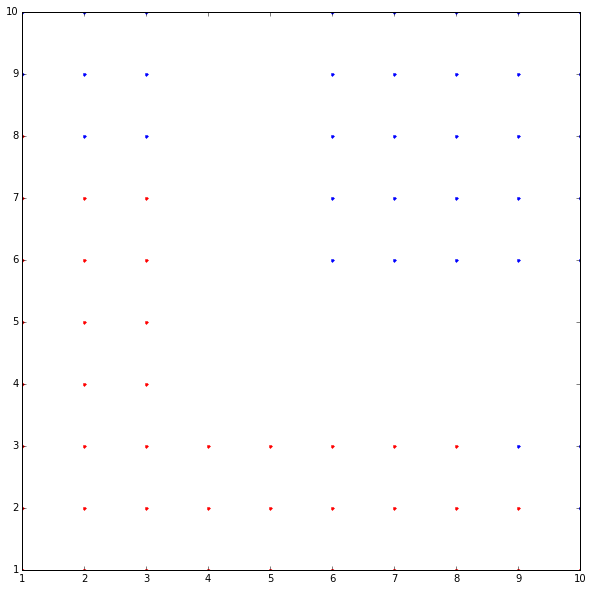

In [56]:
# decision boundary -- right
final_w = np.dot(c,w)
plt.figure(figsize=(10,10))
for i in range(len(Y)):
    if np.sign(np.dot(final_w, X[i])) == 1:
    #if np.sign(np.dot(c, np.sign(np.dot(w, X[i])))) == 1:
        plt.plot(X[i][0], X[i][1], 'r.')
    else:
        plt.plot(X[i][0], X[i][1], 'b.')

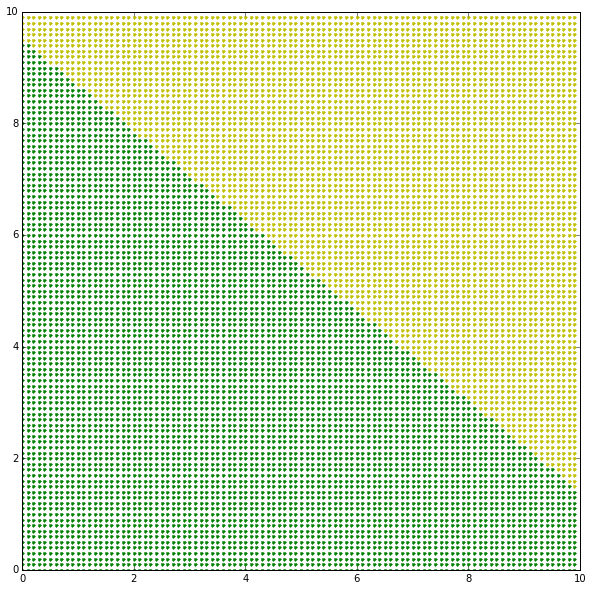

In [59]:
plt.figure(figsize=(10,10))
for i in np.arange(0,10,0.1):
    for j in np.arange(0,10,0.1):
        x = [i,j,1]
        if np.sign(np.dot(final_w, x)) == 1:
        #if np.sign(np.dot(c, np.sign(np.dot(w, x)))) == 1:
            plt.plot(x[0], x[1], 'g.')
        else:
            plt.plot(x[0], x[1], 'y.')

In [ ]:
# ==============================================================================

In [39]:
# load data
f = open("data2.txt", "r")
X = []
Y = []
for line in f.readlines():
    x = line.split()
    X.append([int(x[0]), int(x[1]), 1])
    Y.append(int(x[2]))

In [33]:
# quadratic kernel
T = 5
alpha = np.zeros([len(Y),1])
#phi = np.zeros([len(Y), len(Y)])
#for i in range(len(Y)):
#    for j in range(len(Y)):
#        phi[i][j] = (1 + np.dot(X[i], X[j]))**2
for iteration in range(T):
    X, Y = shuffle(X, Y)
    for i in range(len(Y)):
        s = 0
        for j in range(len(alpha)):
            s += alpha[j] * Y[j] * (1 + np.dot(X[i], X[j]))**2
        s *= Y[i]
        if s <= 0:
            alpha[i] += 1

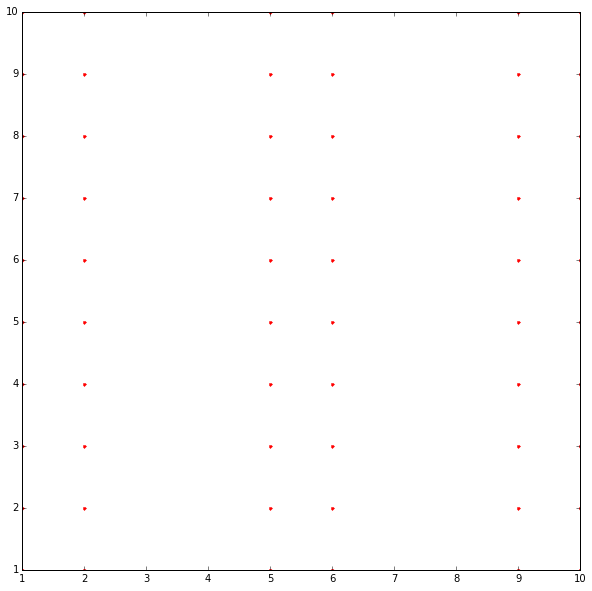

In [34]:
# decision boundary -- right
plt.figure(figsize=(10,10))
for i in range(len(Y)):
    s = 0
    for j in range(len(alpha)):
        s += alpha[j] * Y[j] * (1 + np.dot(X[i], X[j]))**2
    if np.sign(s) == 1:
        plt.plot(X[i][0], X[i][1], 'r.')
    else:
        plt.plot(X[i][0], X[i][1], 'b.')

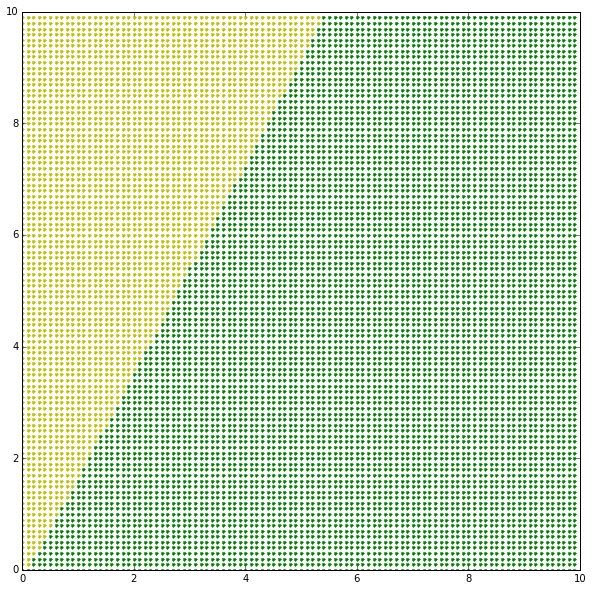

In [24]:
plt.figure(figsize=(10,10))
for i in np.arange(0,10,0.1):
    for j in np.arange(0,10,0.1):
        x = [i,j,1]
        s = 0
        for j in range(len(alpha)):
            s += alpha[j] * Y[j] * (1 + np.dot(x, X[j]))**2
        if np.sign(s) == 1:
            plt.plot(x[0], x[1], 'g.')
        else:
            plt.plot(x[0], x[1], 'y.')

In [36]:
# RBF kernel
T = 1
alpha = np.zeros([len(Y),1])
sigma = 2
for iteration in range(T):
    X, Y = shuffle(X, Y)
    for i in range(len(Y)):
        s = 0
        for j in range(len(alpha)):
            s += alpha[j] * Y[j] * math.exp(- np.dot(np.subtract(X[i], X[j]), np.subtract(X[i], X[j])) / (2 * sigma**2))
        s *= Y[i]
        if s <= 0:
            alpha[i] += 1

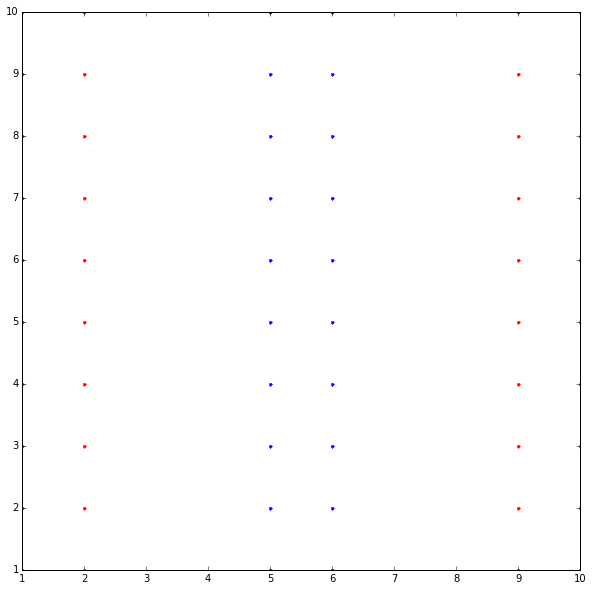

In [37]:
# decision boundary -- right
plt.figure(figsize=(10,10))
for i in range(len(Y)):
    s = 0
    for j in range(len(alpha)):
        s += alpha[j] * Y[j] * math.exp(- np.dot(np.subtract(X[i], X[j]), np.subtract(X[i], X[j])) / (2 * sigma**2))
    if np.sign(s) == 1:
        plt.plot(X[i][0], X[i][1], 'r.')
    else:
        plt.plot(X[i][0], X[i][1], 'b.')

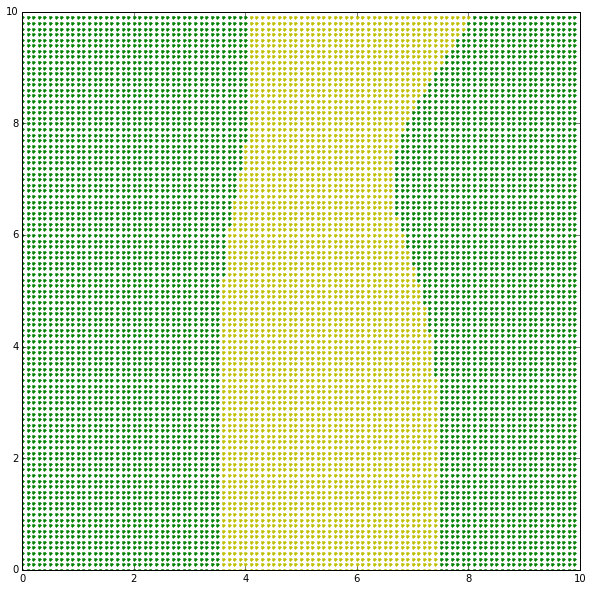

In [38]:
plt.figure(figsize=(10,10))
for i in np.arange(0,10,0.1):
    for j in np.arange(0,10,0.1):
        x = [i,j,1]
        s = 0
        for j in range(len(alpha)):
            s += alpha[j] * Y[j] * math.exp(- np.dot(np.subtract(x, X[j]), np.subtract(x, X[j])) / (2 * sigma**2))
        if np.sign(s) == 1:
            plt.plot(x[0], x[1], 'g.')
        else:
            plt.plot(x[0], x[1], 'y.')

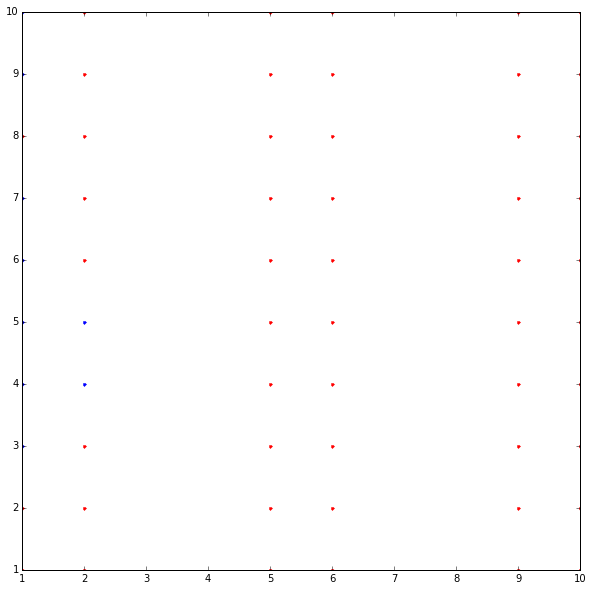

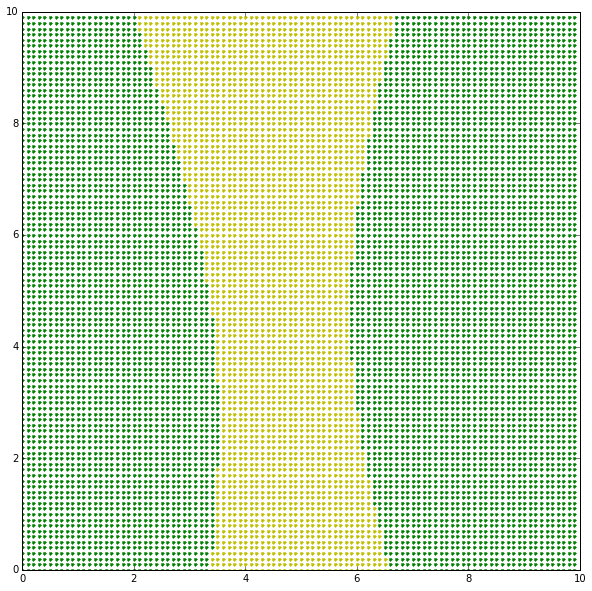

In [40]:
T = 1
alpha = np.zeros([len(Y),1])
sigma = 5
for iteration in range(T):
    X, Y = shuffle(X, Y)
    for i in range(len(Y)):
        s = 0
        for j in range(len(alpha)):
            s += alpha[j] * Y[j] * math.exp(- np.dot(np.subtract(X[i], X[j]), np.subtract(X[i], X[j])) / (2 * sigma**2))
        s *= Y[i]
        if s <= 0:
            alpha[i] += 1
plt.figure(figsize=(10,10))
for i in range(len(Y)):
    s = 0
    for j in range(len(alpha)):
        s += alpha[j] * Y[j] * math.exp(- np.dot(np.subtract(X[i], X[j]), np.subtract(X[i], X[j])) / (2 * sigma**2))
    if np.sign(s) == 1:
        plt.plot(X[i][0], X[i][1], 'r.')
    else:
        plt.plot(X[i][0], X[i][1], 'b.')
plt.figure(figsize=(10,10))
for i in np.arange(0,10,0.1):
    for j in np.arange(0,10,0.1):
        x = [i,j,1]
        s = 0
        for j in range(len(alpha)):
            s += alpha[j] * Y[j] * math.exp(- np.dot(np.subtract(x, X[j]), np.subtract(x, X[j])) / (2 * sigma**2))
        if np.sign(s) == 1:
            plt.plot(x[0], x[1], 'g.')
        else:
            plt.plot(x[0], x[1], 'y.')

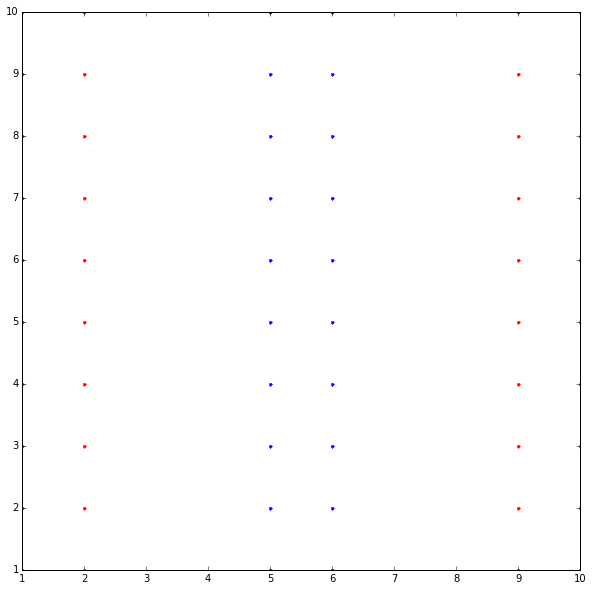

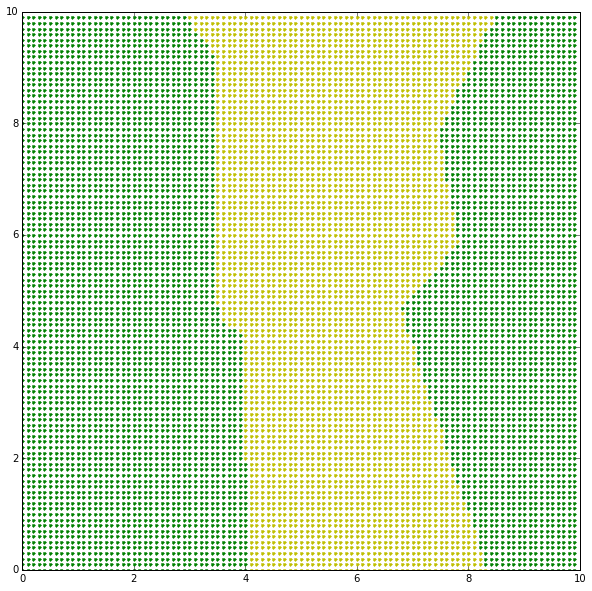

In [41]:
T = 1
alpha = np.zeros([len(Y),1])
sigma = 0.2
for iteration in range(T):
    X, Y = shuffle(X, Y)
    for i in range(len(Y)):
        s = 0
        for j in range(len(alpha)):
            s += alpha[j] * Y[j] * math.exp(- np.dot(np.subtract(X[i], X[j]), np.subtract(X[i], X[j])) / (2 * sigma**2))
        s *= Y[i]
        if s <= 0:
            alpha[i] += 1
plt.figure(figsize=(10,10))
for i in range(len(Y)):
    s = 0
    for j in range(len(alpha)):
        s += alpha[j] * Y[j] * math.exp(- np.dot(np.subtract(X[i], X[j]), np.subtract(X[i], X[j])) / (2 * sigma**2))
    if np.sign(s) == 1:
        plt.plot(X[i][0], X[i][1], 'r.')
    else:
        plt.plot(X[i][0], X[i][1], 'b.')
plt.figure(figsize=(10,10))
for i in np.arange(0,10,0.1):
    for j in np.arange(0,10,0.1):
        x = [i,j,1]
        s = 0
        for j in range(len(alpha)):
            s += alpha[j] * Y[j] * math.exp(- np.dot(np.subtract(x, X[j]), np.subtract(x, X[j])) / (2 * sigma**2))
        if np.sign(s) == 1:
            plt.plot(x[0], x[1], 'g.')
        else:
            plt.plot(x[0], x[1], 'y.')